In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import cleaner as cln

In [2]:
# read in consolidated data file
df = pd.read_csv('../data/consolidated_data_2016_2020.csv')

In [3]:
df.sample(5)

,Unnamed: 0,control_number,species_code,genus,species,subspecies,specific_name,generic_name,wildlf_desc,wildlf_cat,...,ctry_ie,purp,src,trans_mode,act,dp_cd,disp_date,ship_date,i_e,pt_cd
962328,962328,2018414945,SCEM,SCELOPORUS,MALACHITICUS,NaN,GREEN SPINY,LIZARD,LIV,REP,...,NI,T,C,A,C,C,2018-09-12 00:00:00,2018-09-12,I,MI
475809,475809,2017986098,PRNO,PROTOREASTER,NODOSUS,NaN,HORNED SEA,STAR,BOD,OIV,...,PH,T,W,O,C,C,2017-01-13 00:00:00,2017-01-02,I,SF
157437,157437,2019537745,MOSU,MORPHO,SULKOWSKYI,NaN,SULKOWSKY'S MORPHO,BUTTERFLY,BOD,BUT,...,CA,T,W,M,R,S,2019-04-26 00:00:00,2019-04-13,I,CH
588976,588976,2016823657,PIMX,PINCTADA,MAXIMA,NaN,GOLD-LIP,OYSTER,SPR,MOL,...,CH,T,C,A,C,C,2016-03-08 00:00:00,2016-03-05,I,NW
669489,669489,2020702706,ALLM,ALLIGATOR,MISSISSIPPIENSIS,NaN,AMERICAN,ALLIGATOR,JWL,REP,...,FR,T,W,A,C,C,2020-02-06 00:00:00,2020-01-30,I,NW


In [4]:
# # drop irrelevant columns
# drop_cols = ['Unnamed: 0']
# df = df.drop(columns=drop_cols)

In [5]:
# check for duplicate rows
duplicated_df = df[df.duplicated(keep='first')]
print(f'number of duplicated rows {duplicated_df.shape[0]:,} out of {df.shape[0]:,} total rows')

# drop duplicated rows
dedup_df = df.drop_duplicates(ignore_index=True)
print(f'rows remaining {dedup_df.shape[0]:,}')

number of duplicated rows 0 out of 2,093,505 total rows
rows remaining 2,093,505


In [6]:
duplicated_df.head()

,Unnamed: 0,control_number,species_code,genus,species,subspecies,specific_name,generic_name,wildlf_desc,wildlf_cat,...,ctry_ie,purp,src,trans_mode,act,dp_cd,disp_date,ship_date,i_e,pt_cd


In [7]:
# save duplicated df to data folder path 
path = '../data/raw/'
output_name = 'duplicated.csv'
duplicated_df.to_csv(f'{path}{output_name}', index=False)

In [8]:
duplicated_df.groupby(['control_number', 'generic_name', 'wildlf_desc','i_e','cartons','qty']).agg(count=('control_number', 'count')).reset_index().sort_values(by=['count'], ascending=False)[:60]

,control_number,generic_name,wildlf_desc,i_e,cartons,qty,count


In [9]:
duplicated_df.generic_name.value_counts()[:60]

Series([], Name: generic_name, dtype: int64)

In [10]:
#### Missing Values

<AxesSubplot:>

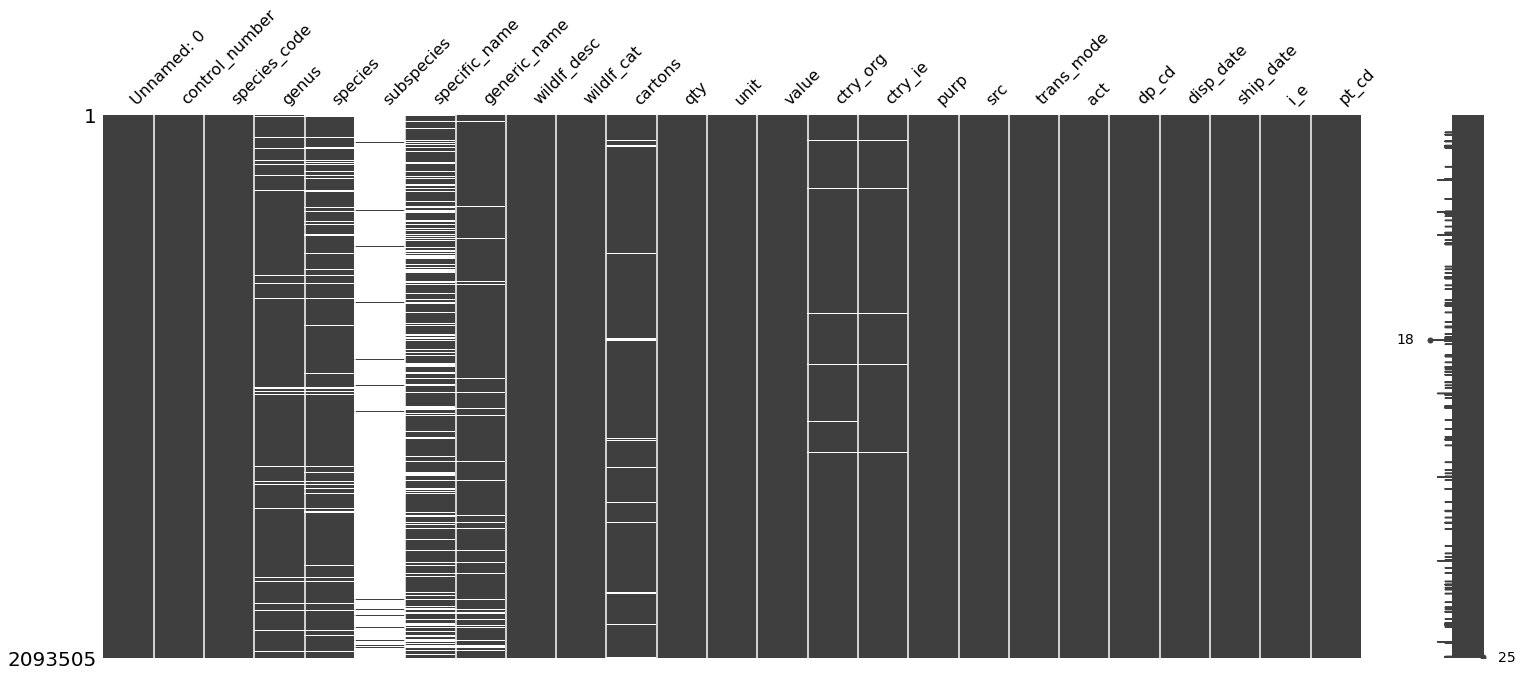

In [11]:
msno.matrix(df)

<AxesSubplot:>

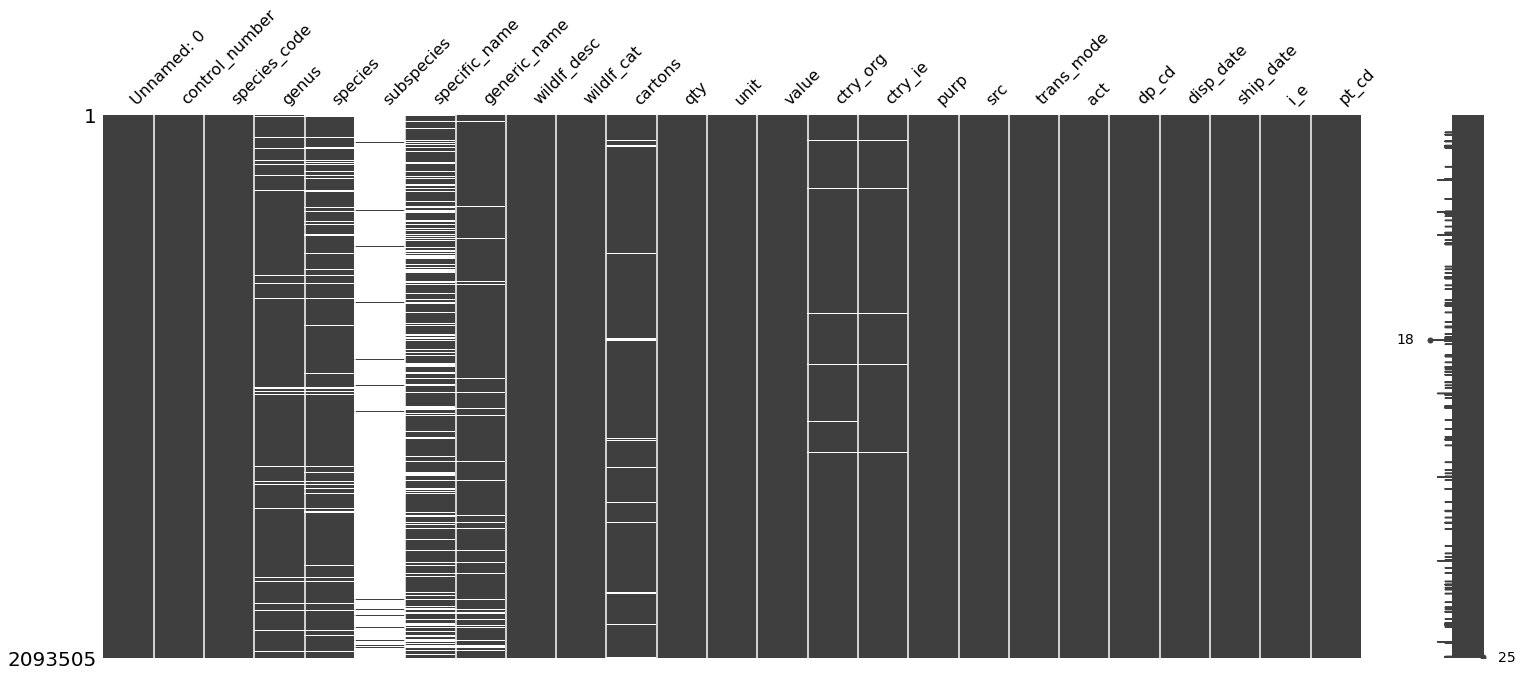

In [12]:
msno.matrix(dedup_df)

<AxesSubplot:>

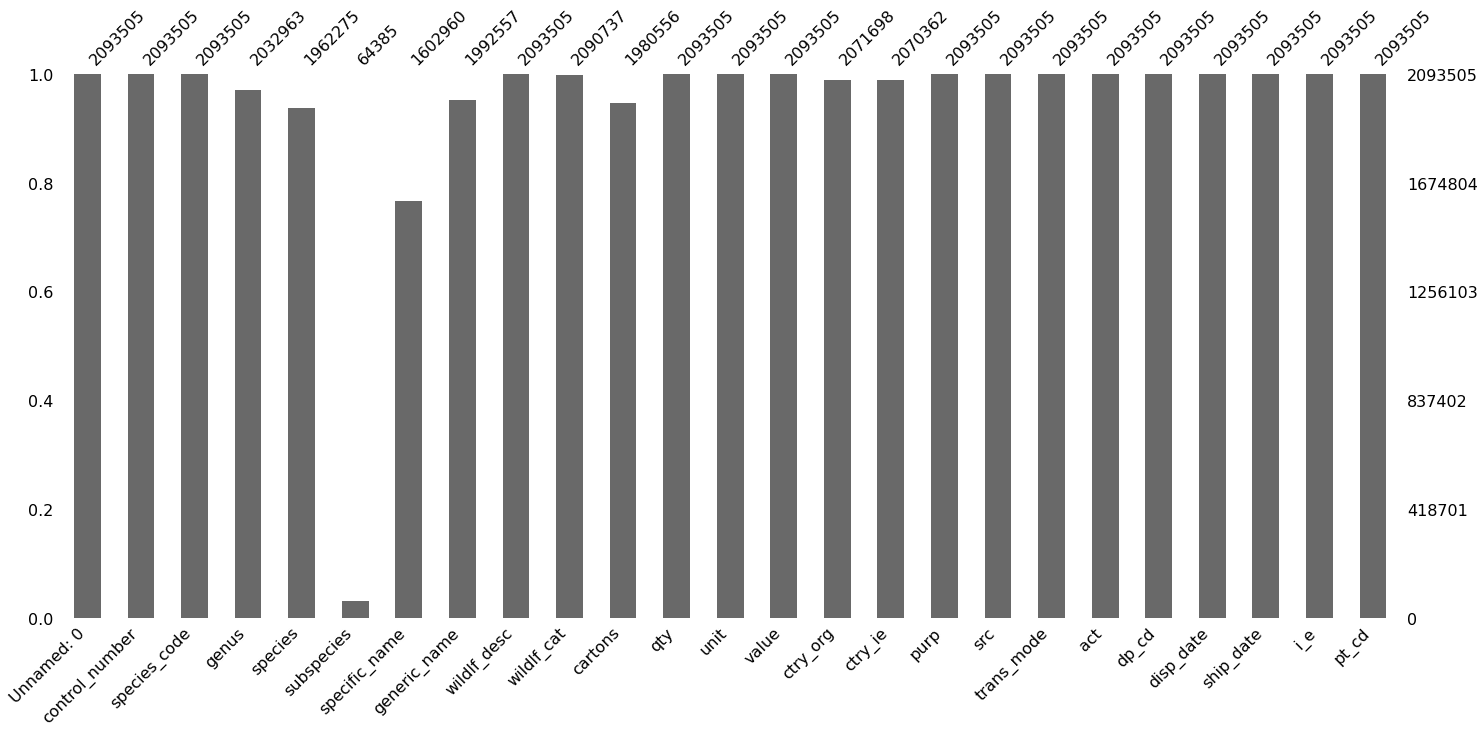

In [13]:
msno.bar(dedup_df)

<AxesSubplot:>

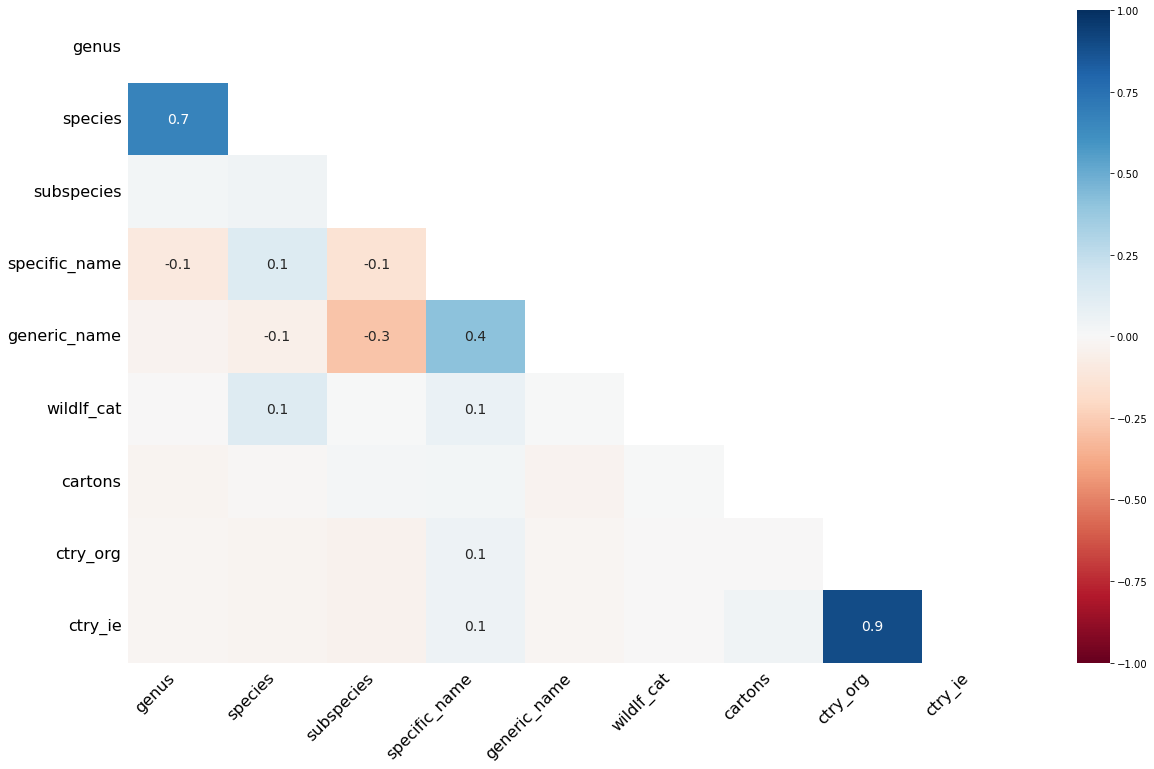

In [14]:
# check nullility correlation 
msno.heatmap(dedup_df)

In [15]:
missing_df = pd.DataFrame(round(df.isna().sum()/len(df)*100,2), columns=['pct_na'])
missing_df['pct_na']
missing_df

,pct_na
Unnamed: 0,0.00
control_number,0.00
species_code,0.00
genus,2.89
species,6.27
subspecies,96.92
specific_name,23.43
generic_name,4.82
wildlf_desc,0.00
wildlf_cat,0.13


In [16]:
#### Target Variable Imbalance

In [17]:
df.act.value_counts()

C    2061325
R      32180
Name: act, dtype: int64

In [18]:
df.dp_cd.value_counts()

C    2063452
S      15007
R      11693
A       2738
N        499
O        116
Name: dp_cd, dtype: int64

In [19]:
df.i_e.value_counts()

I    1761225
E     331979
T        226
*         75
Name: i_e, dtype: int64

In [20]:
df[df.i_e== 'T'].act.value_counts()

C    131
R     95
Name: act, dtype: int64

In [21]:
df[df.i_e== '*'].act.value_counts()

C    74
R     1
Name: act, dtype: int64

In [22]:
df[df.i_e== 'E'].act.value_counts()

C    328899
R      3080
Name: act, dtype: int64

In [23]:
df[df.i_e== 'I'].act.value_counts()

C    1732221
R      29004
Name: act, dtype: int64

In [24]:
df.species_code.nunique()

14055

In [28]:
df.shape[0]/df.species_code.nunique()

148.95090715048025